In [155]:
import numpy as np
import matplotlib.pylab as pl
import os
import ot
import ot.plot
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import joblib
sys.path.append('src/GOW')
from GOW import GOW_sinkhorn_autoscale

In [156]:
def get_convergence_array(dataset_path, index1, index2):
    X_train = joblib.load(dataset_path + 'X_train.pkl')
    X_test = joblib.load(dataset_path + 'X_test.pkl')
    y_train = joblib.load(dataset_path + 'y_train.pkl')
    y_test = joblib.load(dataset_path + 'y_test.pkl')

    seq1 = np.array(X_train[index1])
    seq2 = np.array(X_test[index2])

    print('Labels:', y_train[index1], ', ', y_test[index2])

    n = len(seq1)
    m = len(seq2)
    
    # distributions
    a = np.ones(n) / n
    b = np.ones(m) / m

    C = ot.dist(seq1, seq2, metric='minkowski')
    C = C / C.max()

    return GOW_sinkhorn_autoscale(a, b, C, 8, 30, epsilon=0.0001, num_FW_iteration=1000, maxIter=30, return_convergence_array=True)

# MSR Action 3D

Labels: 1 ,  6
Iterations: 4
Convergence Array: [0.38407290126189336, 0.38309227393455836, 0.38308053607880854, 0.38308172530825957]


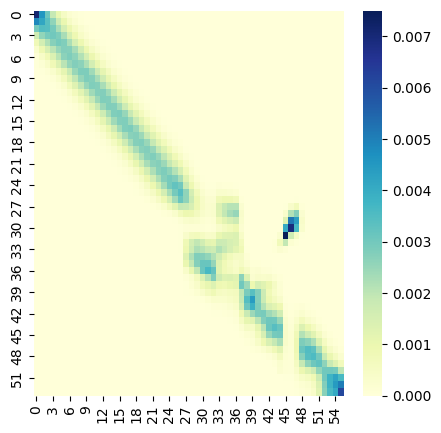

In [157]:
data_path = 'Datasets/MSRAction3D/'
new_C, new_P, alpha, convergence_array = get_convergence_array(data_path, 0, 15)

plt.figure(figsize=(5,5))
sns.heatmap(new_P, cmap="YlGnBu", annot=None)
print("Convergence Array:", convergence_array)

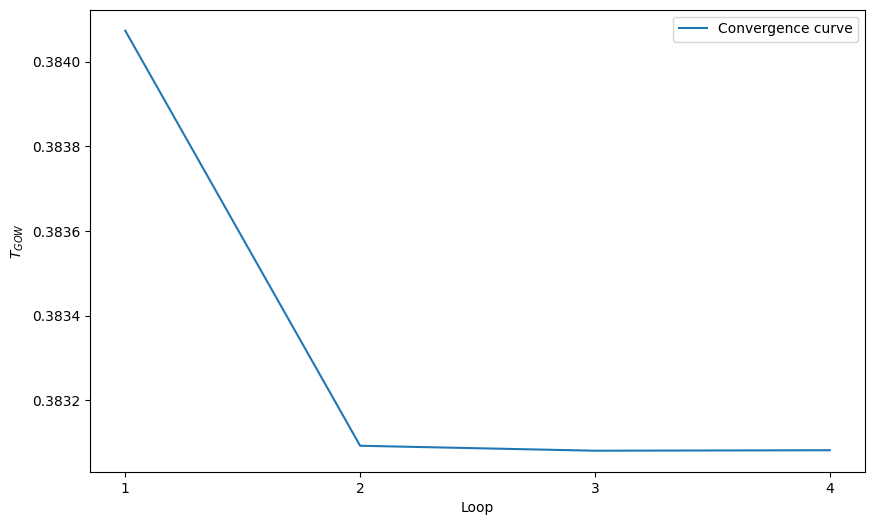

In [158]:
pl.figure(1, figsize=(10, 6))
x = np.arange(len(convergence_array), dtype=np.float64) + 1
pl.xlabel('Loop')
pl.ylabel('$T_{GOW}$')
pl.plot(x, convergence_array, label='Convergence curve')
pl.xticks(x)
pl.legend()

# MSR Daily Activity

Labels: 3 ,  13
Iterations: 3
Convergence Array: [0.4611002402603445, 0.46106421723790797, 0.4610638507352526]


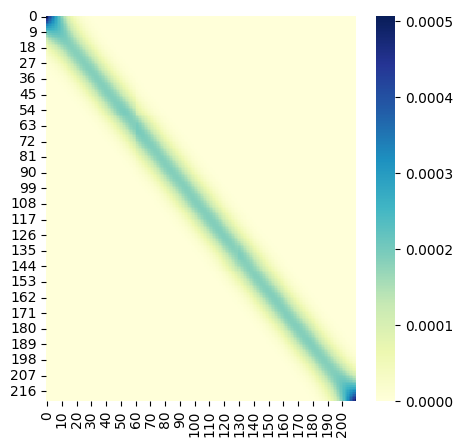

In [159]:
data_path = 'Datasets/MSRDailyActivity3D/'
new_C, new_P, alpha, convergence_array = get_convergence_array(data_path, 5, 25)

plt.figure(figsize=(5,5))
sns.heatmap(new_P, cmap="YlGnBu", annot=None)
print("Convergence Array:", convergence_array)

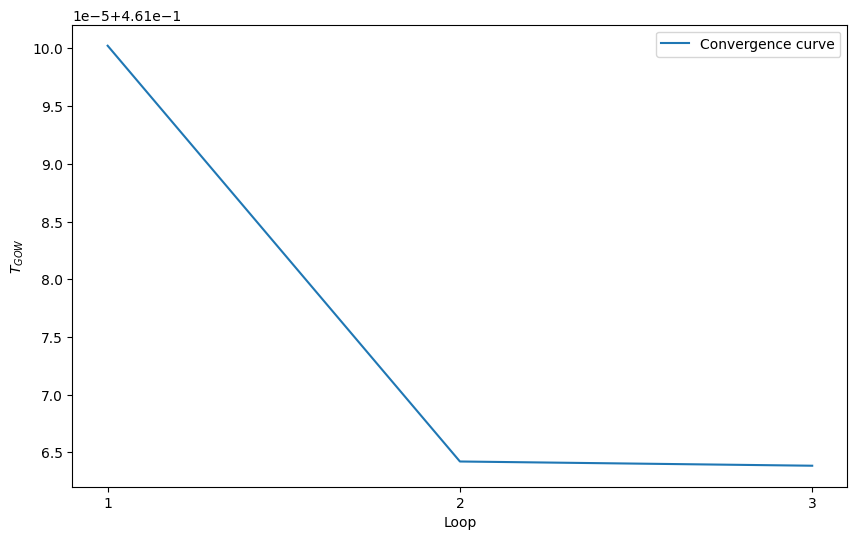

In [160]:
pl.figure(1, figsize=(10, 6))
x = np.arange(len(convergence_array), dtype=np.float64) + 1
pl.xlabel('Loop')
pl.ylabel('$T_{GOW}$')
pl.plot(x, convergence_array, label='Convergence curve')
pl.xticks(x)
pl.legend()

# Spoken Arabic Digit

Labels: 0 ,  1
Iterations: 4
Convergence Array: [0.3699128863117948, 0.3698591587422275, 0.3698578915205355, 0.3698576437732145]


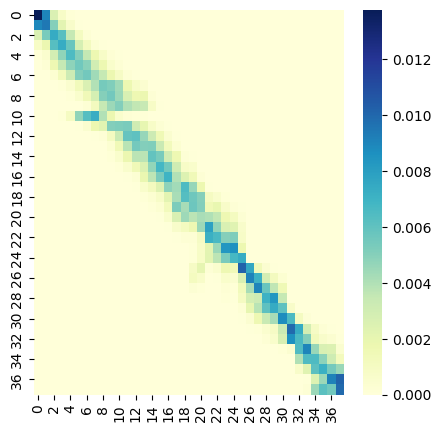

In [161]:
data_path = 'Datasets/SpokenArabicDigit/Cut/'
new_C, new_P, alpha, convergence_array = get_convergence_array(data_path, 0, 15)

plt.figure(figsize=(5,5))
sns.heatmap(new_P, cmap="YlGnBu", annot=None)
print("Convergence Array:", convergence_array)

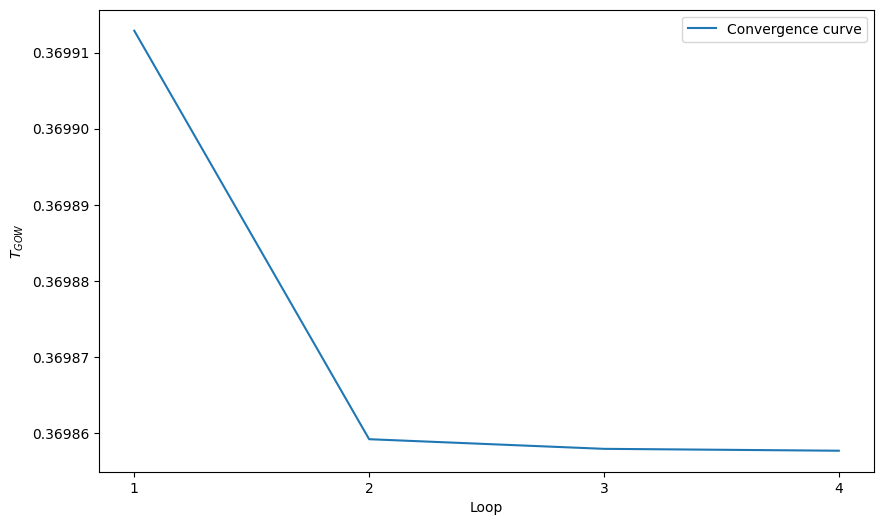

In [162]:
pl.figure(1, figsize=(10, 6))
xx = np.arange(len(convergence_array), dtype=np.float64) + 1
pl.xlabel('Loop')
pl.ylabel('$T_{GOW}$')
pl.plot(xx, convergence_array, label='Convergence curve')
pl.xticks(xx)
pl.legend()

# Weizmann

bend walk
(84, 2450) (73, 2450)
Iterations: 5


[0.5514739994590442,
 0.5512590210492906,
 0.5512588650534918,
 0.5512589252324833,
 0.5512589204582333]

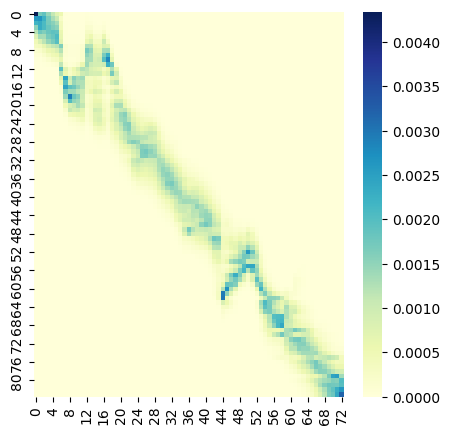

In [165]:
directory = "Datasets/Weizmann/binary"

X = []
y = np.empty(80, dtype='<U9')

index = 0

for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    # checking if it is a file
    if os.path.isfile(f):
        X.append(joblib.load(f))
        y[index] = filename.split('_')[1]
        index = index + 1

X_train = X[0:40]
y_train = y[0:40]
X_test = X[40:80]
y_test = y[40:80]

seq1 = X_train[0]
seq2 = X_test[17]

print(y_train[0], y_test[17])

print(seq1.shape, seq2.shape)

n = seq1.shape[0]
m = seq2.shape[0]

x = np.arange(n, dtype=np.float64)

# distributions
a = np.ones(n) / n
b = np.ones(m) / m

C = ot.dist(seq1, seq2, metric='minkowski')
C = C / C.max()
new_C, new_P, alpha, convergence_array = GOW_sinkhorn_autoscale(a, b, C, 8, 30, epsilon=0.00001, num_FW_iteration=10000, maxIter=30, return_convergence_array=True)

plt.figure(figsize=(5,5))
sns.heatmap(new_P, cmap="YlGnBu", annot=None)
convergence_array

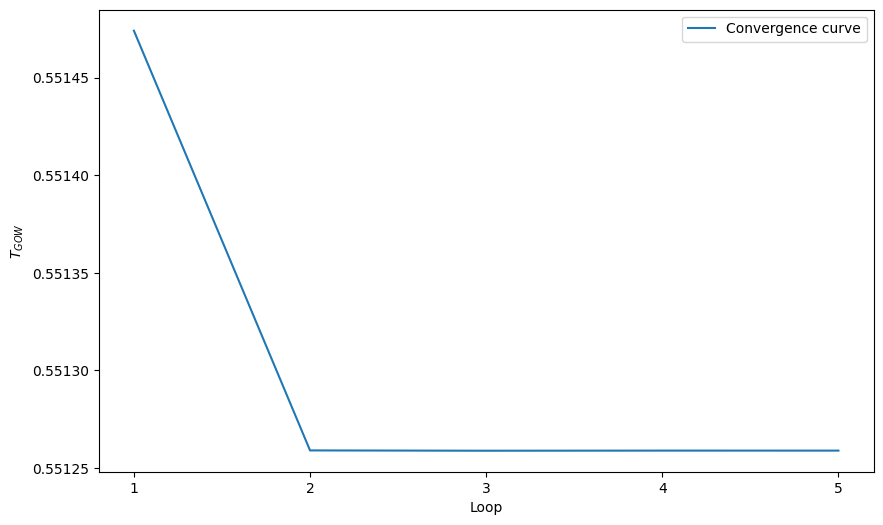

In [166]:
pl.figure(1, figsize=(10, 6))
xx = np.arange(len(convergence_array), dtype=np.float64) + 1
pl.xlabel('Loop')
pl.ylabel('$T_{GOW}$')
pl.plot(xx, convergence_array, label='Convergence curve')
pl.xticks(xx)
pl.legend()